In [1]:
import numpy as np
import time
from function import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, 1:-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])
one_hot = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
    one_hot[i, Y[i]] = 1.0

In [4]:
class Deep_Evolution_Strategy:
    
    def __init__(self, weights, inputs, solutions, reward_function, population_size, sigma, learning_rate):
        self.weights = weights
        self.inputs = inputs
        self.solutions = solutions
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate
        
    def _get_weight_from_population(self, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(self.weights[index] + jittered)
        return weights_population
    
    def get_weight(self):
        return self.weights
    
    def predict(self, weights, inputs, activation_function = None):
        if activation_function[0]:
            w = activation_function[0](inputs * weights[0])
        else:
            w = inputs * weights[0]
        for n in range(1, len(weights)):
            if activation_function[n]:
                w = activation_function[n](np.dot(w, weights[n]))
            else:
                w = np.dot(w, weights[n])
        return w
    
    def train(self, epoch):
        population = []
        rewards = np.zeros(self.population_size)
        for k in range(self.population_size):
            x = []
            for w in self.weights:
                x.append(np.random.randn(*w.shape))
            population.append(x)
        for k in range(self.population_size):
            weights_population = self._get_weight_from_population(population[k])
            w = self.predict(weights_population, self.inputs, activation_function = activations)
            rewards[k] = self.reward_function(self.solutions, w)
        rewards = (rewards - np.mean(rewards)) / np.std(rewards)
        for index, w in enumerate(self.weights):
            A = np.array([p[index] for p in population])
            self.weights[index] = w + self.learning_rate/(self.population_size * self.sigma) * np.dot(A.T, rewards).T
        predicted= np.argmax(self.predict(self.weights, X, activation_function = activations),axis=1)
        accuracy = np.mean(Y == predicted)
        Z = np.argmax(self.predict(self.weights, np.c_[xx.ravel(), yy.ravel()], activation_function = activations),axis=1)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
        cont = plt.title('Evolution Strategies decision boundary, epoch %d, accuracy validation: %f'%(epoch+1, accuracy))
        return cont

In [5]:
size_population = 50
sigma = 0.1
learning_rate = 0.005
epoch = 100

weights = [np.random.randn(X.shape[1]),
           np.random.randn(X.shape[1],20),
           np.random.randn(20,one_hot.shape[1])]
activations = [sigmoid, sigmoid, softmax]
deep_evolution = Deep_Evolution_Strategy(weights, X, one_hot, cross_entropy, 
                                         size_population, sigma, learning_rate)

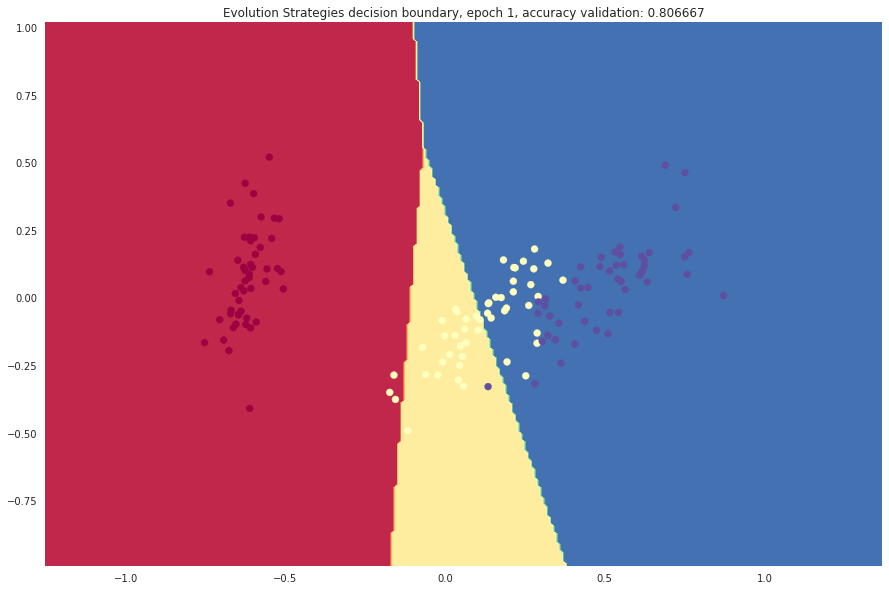

In [6]:
fig = plt.figure(figsize=(15,10))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.argmax(deep_evolution.predict(deep_evolution.get_weight(), np.c_[xx.ravel(), yy.ravel()], activation_function = activations),axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
predicted= np.argmax(deep_evolution.predict(deep_evolution.get_weight(), X, activation_function = activations),axis=1)
accuracy = np.mean(Y == predicted)
plt.title('Evolution Strategies decision boundary, epoch %d, accuracy: %f'%(0, accuracy))
anim = animation.FuncAnimation(fig, deep_evolution.train, frames=100, interval=200)
anim.save('animation-evolution-iris.gif', writer='imagemagick', fps=5)
#HTML(anim.to_html5_video())